<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/notebooks/phd/Lecture_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U torch==1.8.0 torchtext==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 735.5 MB 12 kB/s 
     |████████████████████████████████| 7.1 MB 20.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.8.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.8.0 which is incompatible.


# Hands on Python for Data Science


### PhD IMT School for Advanced Studies Lucca 2021-2022

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2021/2022<br/>
July, 5 2022

# Outline

- Pytorch
- Neural Network (fully connected)
  - Classification
  - Learning rate
  - Regression on tabular data
  - Classification on tabular data with embeddings
- CNN
- RNN



# Pytorch 

## Why ```pytorch```?

1. Because I've already done something in PyTorch
2. It is widely used now in the research environment 
3. It is more _pythonic_ the way it is implemented, thus the learning curve can be smoother than with other platform
  - use
  - extend
  - debug
4. Tensors are really similar to numpy arrays 
5. (not in our goals) It can be used for scientific computation as well, not only for _Deep Learning_ tasks



In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#import for pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
# import torchvision
# from torchvision import transforms
from PIL import Image, ImageFile



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# pytorch is available naturally on colab
# we can also use a gpu
# Go to Menu > Runtime > Change runtime.


import torch
# GPU available check 
print('GPU available check {}'.format(torch.cuda.is_available()))
print(torch.rand(2,2))

GPU available check False
tensor([[0.0794, 0.5041],
        [0.1459, 0.2920]])


## Tensors 

- A tensor is both a container for **numbers** and for a set of rules that define transformations between tensors producing a new tensor

- **Essentially?** A multidimensional array
- Every tensor has a rank
  - scalar --> rank 0 
  - array --> rank 1
  - $n \times n$ matrix --> rank 2

```python torch.rand(2,2)``` creates a rank 2 tensor with random values by using ```python torch.rand()``` 



### Operations with tensors

In [ ]:
# we can create a tensor from lists
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print(x)

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


In [ ]:
# we can change an element in a tensor by using standard Python indexing

x[0][0] = 5
print(x) 

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


We can use special creation functions to generate particular types of tensors

- ```ones()``` generates tensors filled with 1s
- ```zeros()```  generates tensors filled with 1s

In [ ]:
a = torch.zeros(2,2)
b = torch.ones(2,2)
print('First tensor\n {}'.format(a))
print('Second tensor\n {}'.format(b))

First tensor
 tensor([[0., 0.],
        [0., 0.]])
Second tensor
 tensor([[1., 1.],
        [1., 1.]])


We can perform standard mathematical operations with tensors, e.g. addind two tensors together. 



In [ ]:
a = torch.tensor([[1,2],[2,3]])
b = torch.tensor([[1,1],[1,1]])
print('Check the sum\n {}'.format(a+b))

Check the sum
 tensor([[2, 3],
        [3, 4]])


And if you have a tensor of rank 0, you can access out the value with the ```item()``` function

In [ ]:
print('Value of the 1D tensor: {}'.format(torch.rand(1).item()))

Value of the 1D tensor: 0.33600521087646484


Tensors can live in the **CPU** or on the **GPU** and they can be copied between devices by usint the ```to()``` function:

In [ ]:
cpu_tensor = torch.rand(2)
print('In which device is the tensor? {}'.format(cpu_tensor.device))

In which device is the tensor? cpu


In [ ]:
gpu_tensor = cpu_tensor.to('cuda')
print('In which device is the tensor? {}'.format(gpu_tensor.device))

RuntimeError: ignored

Quite often we need to find the maximum item in a tensor, as well as the index that contains the maximum value (it may correspond to the class that the neural network has decided upon its final prediction). 

```max()``` and ```argmax()``` are the needed functions, then we can use ```item()``` to get the _standard_ Python value from a 1D tensor. 

In [ ]:
a = torch.rand(2,2)
print(a)

print('Which is the max value? {}'.format(a.max()))
print('Which is the index of the max value: {}'.format(a.argmax()))
print('Get the values\n -max: {}\n -index: {}'.format(a.max().item(),a.argmax().item()))

tensor([[0.2148, 0.4776],
        [0.6000, 0.3537]])
Which is the max value? 0.6000468730926514
Which is the index of the max value: 2
Get the values
 -max: 0.6000468730926514
 -index: 2


Sometimes we need to change the type of a tensor

In [ ]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print('which is the type of long tensor? {}'.format(long_tensor.type()))

which is the type of long tensor? torch.LongTensor


In [ ]:
float_tensor = long_tensor.to(dtype=torch.float32)
float_tensor_2 = long_tensor.type(torch.float64) #second method to change type
print('which is the type of long tensor? {}'.format(float_tensor.type()))
print('which is the type of long tensor? {}'.format(float_tensor_2.type()))

which is the type of long tensor? torch.FloatTensor
which is the type of long tensor? torch.DoubleTensor


If you remember in ```pandas``` we could perform operations of dataframes using the parameter ```in_place = True```. 

We could perform something similar on tensors. 

Functions can be applied _inplace_ if exists the original fuction with appended underscore '_'. 

Let see an example:

In [ ]:
random_tensor = torch.rand(2,2)
new_random = random_tensor.log2()
print(random_tensor)
print(new_random)

tensor([[0.9137, 0.3767],
        [0.2699, 0.8809]])
tensor([[-0.1302, -1.4086],
        [-1.8896, -0.1830]])


In [ ]:
print(random_tensor.log2_())

tensor([[-0.1302, -1.4086],
        [-1.8896, -0.1830]])


Some nice manipulation that can be done with tensors
- reshape / view
- column permutation
- slice a tensor

Let's try with a simple random tensor, and with the ```MINST``` dataset that is represented in numpy arrays of 784 elements

In [ ]:
'''
reshape() function. It is really similar to numpy reshape function. There are a
lot of similarities between tensors and numpy operations/functions
'''

flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.reshape(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
view() function. Same behaviour of reshape, the main difference is that the view 
changes if the original one is changed
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))





Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])
Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])


In [ ]:
'''
The reshaped tensor can't have a number of elements different than the original one
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(3,28,28)

RuntimeError: ignored

In [ ]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:50000]
y_train = y[:50000]

X_val = X[50000:60000]
y_val = y[50000:60000]

X_test = X[60000:]
y_test = y[60000:]

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape)

(50000, 784)


In [ ]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
print('shape of x train: {}'.format(X_train.shape))

shape of x train: (50000, 784)


In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
'''
Let's create a tensor from the numpy arrays
'''
x_train_tensor,x_val_tensor, x_test_tensor = map(torch.FloatTensor, (X_train, X_val, X_test))
y_train_tensor,y_val_tensor, y_test_tensor = map(torch.LongTensor, (y_train, y_val, y_test))

# y_train_tensor = y_train_tensor.type(torch.LongTensor)
# y_test_tensor = y_test_tensor.type(torch.LongTensor)

In [ ]:
print(x_train_tensor.shape,x_train_tensor.size())
x_train_tensor_reshaped = x_train_tensor.reshape([-1,28,28])

print(x_train_tensor_reshaped.size())


torch.Size([50000, 784]) torch.Size([50000, 784])
torch.Size([50000, 28, 28])


In [ ]:
y_train[0]

5

In [ ]:
x_train_tensor_reshaped[0:1]

tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
     

Dimensions permutations. The order of the "columns" is not the one useful for our tasks so we need to change the order. 
For instance, images are stored as ```[height, width, channel]``` tensors, but PyTorch prefers to deal with these in a ```[channel, height, width ] order```

```
permute() 
```

In [ ]:
hwc_tensor = torch.rand(643,232,9)
chw_tensor = hwc_tensor.permute(2,0,1)
print('Shape of hwc tensor {}',hwc_tensor.shape)
print('Shape of chw tensor {}',chw_tensor.shape)

Shape of hwc tensor {} torch.Size([643, 232, 9])
Shape of chw tensor {} torch.Size([9, 643, 232])


Slice on tensors to access certain elements of the data structrure

the shape is torch.Size([50000, 28, 28])
the shape of the cropped tensor is torch.Size([50000, 28, 10])


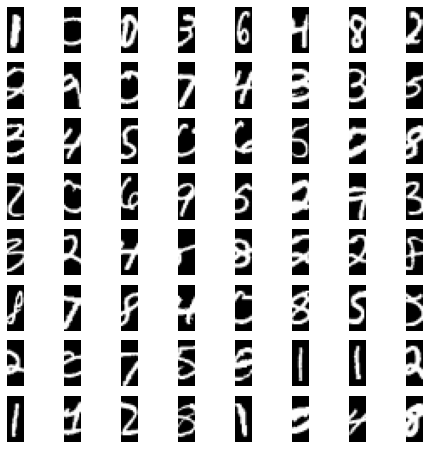

In [ ]:
'''
Take the ten first lines for all the images
'''

print('the shape is {}'.format(x_train_tensor_reshaped.size()))

selected_part = x_train_tensor_reshaped[:,:,10:20]

print('the shape of the cropped tensor is {}'.format(selected_part.size()))

fig, axes = plt.subplots(8,8,figsize=(8,8))
for i in range(8):
    for j in range(8):
        num_index = np.random.randint(len(selected_part))
        axes[i,j].imshow(selected_part[num_index].numpy(), cmap="gray")
        axes[i,j].axis("off")
plt.show() 

In [ ]:
selected_part[num_index].numpy()

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   3.,  62., 232., 254., 255., 166.],
       [  0.,   0.,   0.,  59., 180., 253., 253., 253., 253., 253.],
       [  0.,   3., 139., 246., 253., 253., 253., 253., 253., 253.],
       [ 14., 188., 253., 253., 253., 253., 253., 253., 253., 253.],
       [183., 253., 253., 253., 253., 253., 253., 253., 253., 253.],
       [253., 253., 253., 216.,  36.,  50., 228., 253., 253., 253.],
       [253., 253., 253., 253., 158., 119., 233., 253., 253., 253.],
       [253., 253., 253., 253., 253., 253., 253., 253., 233., 126.],
       [163., 245., 253., 253., 253., 253., 253., 189.,  53.,   0.],
       [  0., 142., 253., 253., 25

Numpy iteroperability: 
- From ```Tensor``` to ```numpy.array```
- From ```numpy.array``` to ```Tensor```

In [ ]:
points = torch.zeros(3,4)
points_np = points.numpy()

print('Type points: {}'.format(type(points)))
print('Type points_np: {}'.format(type(points_np)))

new_points = torch.from_numpy(points_np)
print('Type new_points: {}'.format(type(new_points)))


Type points: <class 'torch.Tensor'>
Type points_np: <class 'numpy.ndarray'>
Type new_points: <class 'torch.Tensor'>


# Our first Neural Network in this class :-) 

- prepare the data for pytorch ```Dataset``` and ```DataLoader```
- create the network, loss, optimizer
- training 


PyTorch has developed standard conventions of interacting with data that make it fairly consistent to work with, whether you are working with images, text, or audio


```Dataset``` and ```DataLoader``` are two classes used to create the data in the format needed for PyTorch.

- ```Dataset``` is a python class that allows us to get at the data we are supplying to the neural network 
- ```DataLoader``` is what feeds data from the dataset into the network 

Every dataset, no matter whether it includes images, audio, text, etc, can interact with PyTorch if it satisfies this abstract Python class: 

```python
class Dataset(object):
  def __getitem__(self,index):
    raise NotImplementedError
  def __len__(self):
    raise NotImplementedError
```

We have to implement a method that returns the size of our dataset (```len```), and implement a method that can retrieve an item from our dataset in a (*label,tensor*) pair.

The dataset is called, then by the data loader and it pushes data into the the network.

It is possible to use the class ```TensorDataset```

There are also some package that help us on do it, for instance: 
```torchvision``` with ImageFolder, ```torchtext```. 

[torchvision](https://pytorch.org/vision/stable/index.html)

[torchtext](https://pytorch.org/text/stable/index.html)




## Classification

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 32 
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

val_ds = TensorDataset(x_val_tensor, y_val_tensor)
val_dl = DataLoader(
    val_ds, batch_size=batch_size, shuffle=True)


test_ds = TensorDataset(x_test_tensor, y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)


In [ ]:
from torch.utils.data import Dataset, DataLoader
class imageDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
 

In [ ]:
train_ds = imageDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)


The definition of a network uses the ```nn.Module``` of pytorch. 

```Linear``` defines the structure of each layer
```forward``` defines how the data should flow across the different layers of the network
```relu``` is the activation function

For each layer we define the size of the input and the output.
For instance, the first layer takes in input the same shape of the MINST images. Then, it passes the dato to a 200 nodes.

The latest layer returns an output equal to the number of classes. 

To understand which is the predicted class we need to take the ```argmax()``` of the output, such as the index of max score assigned to each instance by the network. 

In [ ]:
class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50,10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
'''
create an instance of the network
'''
simplenet = SimpleNet()

In [ ]:
simplenet.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0349, -0.0061,  0.0212,  ...,  0.0015, -0.0328, -0.0343],
                      [ 0.0258, -0.0041, -0.0068,  ...,  0.0250,  0.0020, -0.0316],
                      [ 0.0269, -0.0247,  0.0289,  ..., -0.0300,  0.0261,  0.0299],
                      ...,
                      [-0.0009, -0.0230,  0.0131,  ...,  0.0187,  0.0125,  0.0059],
                      [-0.0063,  0.0092, -0.0150,  ..., -0.0123,  0.0326,  0.0019],
                      [-0.0011,  0.0062, -0.0107,  ...,  0.0337,  0.0077, -0.0014]])),
             ('fc1.bias',
              tensor([ 2.5799e-02, -1.7794e-02,  6.9596e-03, -1.8355e-03,  3.1126e-02,
                      -7.7219e-03,  3.0161e-02,  1.9462e-02,  1.5210e-02,  3.4194e-02,
                      -2.3933e-02, -2.5618e-02, -1.4039e-02,  1.7047e-02,  2.3271e-02,
                       2.9932e-02, -1.9383e-02,  3.0592e-02, -4.3860e-03,  1.8120e-02,
                      -7.2052e-03, -3.0105e-02,  3.5540e-02,  3.

In [ ]:
simplenet.parameters()

<generator object Module.parameters at 0x7fbd6843bd50>

In [ ]:
'''
Definition of an optimizer, in this case we select the Adam optimizer
Another possible optimizer is the SGD that is possibile to select from 
the same class optim
'''
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)
optimizer_regr = optim.SGD(simplenet.parameters(),lr=0.0001)

In [ ]:
'''
And then, we need a definition of the loss. 
Also in this case, we can select one of those made available by pytorch
For regression, for instance we could select the MSELoss
'''
loss = nn.CrossEntropyLoss()
loss_regression = nn.MSELoss()

In [ ]:
'''
Let's put everything together. 
The network, the optimizer and the loss inside a training loop, using the DataLoader
objects that we have already created.
'''

'''
Note: model.train() --> the model is set on training mode, where the weights and biases 
are adjusted using the training instance passed in batches.
'''


'''
Note: model.eval() --> when we evaluate the model on the validation set.
'''

'''
This function with some refinements can be used for any model, the training process
is really similar, it might change few details
'''

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    model.to(device)
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train() #train status for the mode
        for batch in train_loader:
            optimizer.zero_grad() # clear gradients for next train
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward() # backpropagation, compute gradients
            optimizer.step() # apply gradients
            training_loss += loss.data.item() * inputs.size(0)
            # print(training_loss,loss.data.item(),inputs.size(0))
        training_loss /= len(train_loader.dataset)
        
        with torch.no_grad(): # we are not updating the model
          model.eval() #the status of the model is in eval
          num_correct = 0 
          num_examples = 0
          for batch in val_loader:
              inputs, targets = batch
              inputs = inputs.to(device)
              output = model(inputs)
              targets = targets.to(device)
              loss = loss_fn(output,targets) 
              valid_loss += loss.data.item() * inputs.size(0)
              correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
              num_correct += torch.sum(correct).item()
              num_examples += correct.shape[0]
          valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

1. In each epoch:
  
  a. we take a batch $b$ from our training set
  
  b. we pass $b$ to our model and we compute the loss from the $output$
  
  c. to compute the gradients, we call ```backward()```
  
  d. the ```optimizer.step()``` method uses those gradients afterward to perform the adjustments of the weights

```zero_grad()``` it is used to make sure that gradients are not influeced by previous batches. 


In [ ]:

'''
How to move the model to cuda (if available)
'''

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

simplenet.to(device)


SimpleNet(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
train(simplenet, optimizer,torch.nn.CrossEntropyLoss(), train_dl,val_dl, epochs=5)

Epoch: 1, Training Loss: 0.3219, Validation Loss: 0.1622, accuracy = 0.9547
Epoch: 2, Training Loss: 0.1575, Validation Loss: 0.1741, accuracy = 0.9524
Epoch: 3, Training Loss: 0.1236, Validation Loss: 0.1541, accuracy = 0.9585
Epoch: 4, Training Loss: 0.1111, Validation Loss: 0.1625, accuracy = 0.9578
Epoch: 5, Training Loss: 0.0920, Validation Loss: 0.1274, accuracy = 0.9637


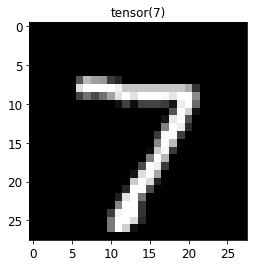

All the scores: tensor([-7.9470,  1.8092,  5.6613,  5.7151,  4.7360,  6.3632, -2.7235, 17.6269,
         5.9668,  8.3147])
The max score: 17.62687873840332
The index of the max score: 7


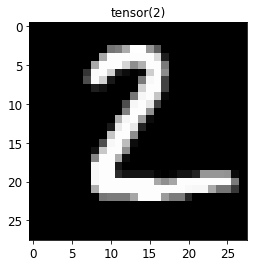

All the scores: tensor([ -8.7529,   0.6192,  14.6989,   3.9918,  -7.1123, -11.4456, -20.1012,
          4.9485,  -5.5607, -13.0810])
The max score: 14.698896408081055
The index of the max score: 2


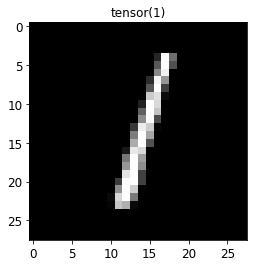

All the scores: tensor([-10.1010,  27.0392,   7.5584,  -1.0269,   1.3571,   1.5390,   8.4418,
          9.7439,   3.9319,   0.3370])
The max score: 27.039199829101562
The index of the max score: 1


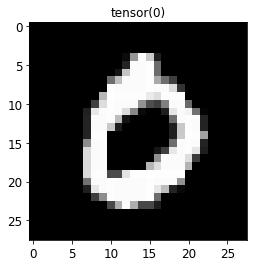

All the scores: tensor([19.5197,  0.8608,  6.5476, -1.2251,  5.3939,  3.3239,  7.7623, 10.1864,
         1.9675,  5.4724])
The max score: 19.51967430114746
The index of the max score: 0


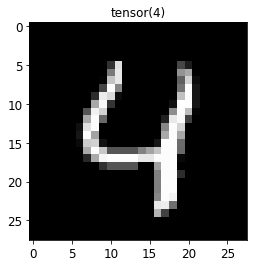

All the scores: tensor([-11.9052, -11.1245,  -2.7085, -18.7705,  12.5376,  -9.4351,  -1.5036,
         -1.8195,  -6.4942,  -2.9556])
The max score: 12.537623405456543
The index of the max score: 4


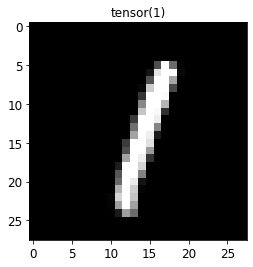

All the scores: tensor([-14.6093,  28.4472,   7.3303,  -3.5272,   3.4683,   1.6060,   7.6638,
         10.9703,   4.9121,   0.8278])
The max score: 28.447242736816406
The index of the max score: 1


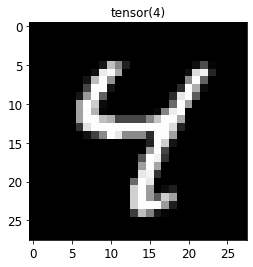

All the scores: tensor([ -6.9393,  -7.1245,  -3.0798, -16.5684,   7.0556,  -9.7358,  -4.3899,
         -6.7062,  -5.2915,  -4.1501])
The max score: 7.055584907531738
The index of the max score: 4


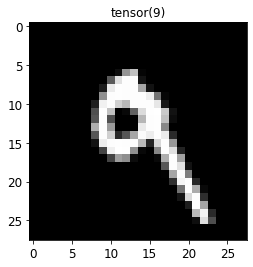

All the scores: tensor([-0.6925,  3.7094,  2.9670,  5.6199,  6.2615,  7.0855, -8.1992,  7.0890,
         4.3501, 13.6435])
The max score: 13.643547058105469
The index of the max score: 9


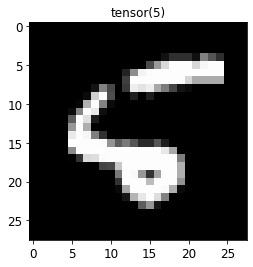

All the scores: tensor([-3.1417, -8.4901, -4.7755, -4.2678, -5.6033,  2.2713, -2.5823, -5.2621,
        -1.0635, -3.8775])
The max score: 2.271263599395752
The index of the max score: 5


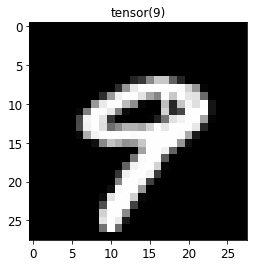

All the scores: tensor([ -5.8310,   2.6272,   1.6561,   0.6036,   9.6601,   7.2727, -12.7378,
          8.1707,   0.3470,  14.7175])
The max score: 14.7174711227417
The index of the max score: 9


In [ ]:
with torch.no_grad():
  simplenet.eval() # we move to eval state, since we don't need to update the weights and biases
  for i in range(10):
    plt.imshow(x_test_tensor[i].reshape((28,28)), cmap="gray")
    plt.title(y_test_tensor[i])
    plt.show()
    print("All the scores: {}".format(simplenet(x_test_tensor[i].float())))
    print("The max score: {}".format(simplenet(x_test_tensor[i].float()).max()))
    print("The index of the max score: {}".format(simplenet(x_test_tensor[i].float()).argmax()))

## Methods to find the best **Learning Rate**
- gridsearch: use different learning rate values, and verify which is the best parameters configuration w.r.t. a certain error measure
- Over the course of an epoch start out with a small learning rate and increase it to higher values over each batch. At the end of the epoch the learning rate will be high. We compute the ```loss``` for each rate. 

Then find in a plot (learning_rate, loss) the learning rate that gives the greatest decline.

In [ ]:
def find_lr(model, loss_fn, optimizer, train_loader,init_value = 1e-8, final_value=1, device="cpu"):
    number_in_epoch = len(train_loader) - 1
    update_step = (final_value / init_value) ** (1 / number_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    training_loss = 0.0
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    model.train()
    for data in train_loader:
      # print('Batch number: {}'.format(batch_num))
      batch_num += 1
      inputs, targets = data
      inputs = inputs.to(device)
      targets = targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = loss_fn(outputs, targets)
      # print(loss)
      # Crash out if loss explodes

      if batch_num > 1 and loss > 10 * best_loss:
        print('Exploded current loss: {} best_loss: {}'.format(loss,best_loss))
        return log_lrs, losses

      # Record the best loss

      if loss < best_loss or batch_num == 1:
          best_loss = loss

      # Store the values
      losses.append(loss.item())
      log_lrs.append((lr))

      # Do the backward pass and optimize

      loss.backward()
      optimizer.step()

        # Update the lr for the next step and store

      lr *= update_step
      optimizer.param_groups[0]["lr"] = lr
    
    print(len(log_lrs),len(losses))
    if len(log_lrs) > 20:
      print(len(log_lrs),len(losses))
      return log_lrs[10:-5], losses[10:-5]
    else:
      return log_lrs, losses


In [ ]:
#load the data again just to be sure what we are using
batch_size = 128
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

simplenet = SimpleNet()
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)
(lrs, losses) = find_lr(simplenet, torch.nn.CrossEntropyLoss(), optimizer, train_dl,device='cpu')


Exploded current loss: 3.186920642852783 best_loss: 0.27382245659828186


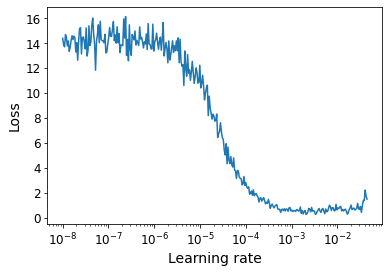

In [ ]:
plt.plot(lrs, losses,)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## Regression
Let's try now with a regression problem

we will use the wine quality data and try to regress on the quality

In [ ]:
path_github = 'https://raw.githubusercontent.com/fpinell/hands_on_python_for_ds/main/data/winequality-white.csv'
df = pd.read_csv(path_github,sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


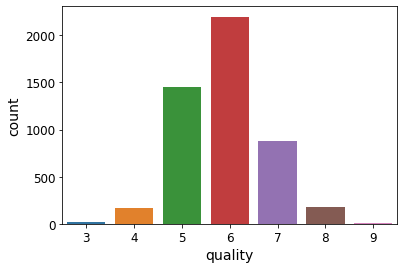

In [ ]:
import seaborn as sns

sns.countplot(x = 'quality', data=df)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # scaling the data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


In [ ]:
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
print("The type of train_dataset is? {}".format(type(train_dataset)))

The type of train_dataset is? <class '__main__.RegressionDataset'>


In [ ]:
EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = X.shape[1]

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
print("The type of train_dataset is? {}".format(type(train_loader)))

The type of train_dataset is? <class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [ ]:
model = MultipleRegression(NUM_FEATURES)


In [ ]:
model

MultipleRegression(
  (layer_1): Linear(in_features=11, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model = MultipleRegression(NUM_FEATURES)
# model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


MultipleRegression(
  (layer_1): Linear(in_features=11, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model.to(device)
print("Begin training.")
for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.reshape(-1,1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')


Begin training.
Epoch 001: | Train Loss: 32.86743 | Val Loss: 25.86150
Epoch 002: | Train Loss: 10.88910 | Val Loss: 1.10699
Epoch 003: | Train Loss: 0.88484 | Val Loss: 0.78554
Epoch 004: | Train Loss: 0.80131 | Val Loss: 0.76632
Epoch 005: | Train Loss: 0.76513 | Val Loss: 0.74997
Epoch 006: | Train Loss: 0.74099 | Val Loss: 0.73444
Epoch 007: | Train Loss: 0.72318 | Val Loss: 0.71661
Epoch 008: | Train Loss: 0.70860 | Val Loss: 0.70458
Epoch 009: | Train Loss: 0.69079 | Val Loss: 0.69420
Epoch 010: | Train Loss: 0.68946 | Val Loss: 0.68754
Epoch 011: | Train Loss: 0.66791 | Val Loss: 0.68011
Epoch 012: | Train Loss: 0.66897 | Val Loss: 0.67269
Epoch 013: | Train Loss: 0.66314 | Val Loss: 0.66465
Epoch 014: | Train Loss: 0.63989 | Val Loss: 0.66386
Epoch 015: | Train Loss: 0.63572 | Val Loss: 0.65194
Epoch 016: | Train Loss: 0.62458 | Val Loss: 0.66218
Epoch 017: | Train Loss: 0.61756 | Val Loss: 0.63810
Epoch 018: | Train Loss: 0.61810 | Val Loss: 0.63052
Epoch 019: | Train Loss: 0.

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

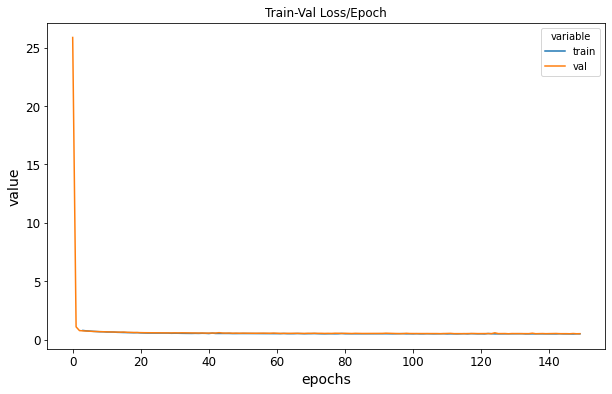

In [ ]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(10,6))
sns.lineplot(data=train_val_loss_df.loc[3:,:], x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

Mean Squared Error : 0.5403112343808196
R^2 : 0.3312641958913827


### Classification with embeddings

Tabular data might contain continous values as well as discrite values (categories). 
- Categorical variable can be handled with: 
  - onehot encoding
  - embeddings --> use Neural Networks to project the data in a new space where similar objects are closer. 

  Let's try to see this latest part 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/titanic/train.csv')


df_train = df[['PassengerId','Survived','Pclass', 
                     'Sex', 'Age', 'SibSp','Parch',
                     'Fare', 'Embarked']].copy()

X = df_train[['Pclass', 'Sex', 'Age', 'SibSp','Parch',
                     'Fare', 'Embarked']].copy()
Y = df_train[['Survived']].copy()



cat_columns = ["Pclass", "Sex", "Embarked"]
num_columns = ["Age", "SibSp", "Parch", "Fare"]


for c in cat_columns:
  X[c] =  X[c].astype("category")


embedded_cols = {n: len(col.cat.categories) for n,col in X[cat_columns].items() }
emb_cols = embedded_cols.keys() # names of columns chosen for embedding
print(emb_cols)
emb_szs = [(c+1, 2) for _,c in embedded_cols.items()] #embedding sizes for the chosen columns


dict_keys(['Pclass', 'Sex', 'Embarked'])


In [ ]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
class myCategoricalDataset(Dataset):
    def __init__(self, X, Y, emb_cols):
        X = X.copy()
        self.X1 = X.loc[:,emb_cols].copy().values.astype(np.int64) #categorical columns
        self.X2 = X.drop(columns=emb_cols).copy().values.astype(np.float32) #numerical columns
        self.y = Y.copy().values.astype(np.int64)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X1[idx], self.X2[idx], self.y[idx]
 

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X.dtypes[col] == "object":
        X[col] = X[col].fillna("NA")
    X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
train_ds = myCategoricalDataset(X, Y, emb_cols)
valid_ds = myCategoricalDataset(X, Y, emb_cols)

batch_size = 64
train_dl = DataLoader(train_ds, batch_size=batch_size,shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size,shuffle=True)

In [ ]:
class MoreComplexNN(nn.Module):
    def __init__(self, embedding_sizes, n_cont):
        super().__init__()
        self.embeddings = nn.ModuleList([nn.Embedding(categories, size) for categories,size in embedding_sizes])
        n_emb = sum(e.embedding_dim for e in self.embeddings) #length of all embeddings combined
        self.n_emb, self.n_cont = n_emb, n_cont
        self.lin1 = nn.Linear(self.n_emb + self.n_cont, 200)
        self.lin2 = nn.Linear(200, 70)
        self.lin3 = nn.Linear(70, 2)
        self.bn1 = nn.BatchNorm1d(self.n_cont)
        self.bn2 = nn.BatchNorm1d(200)
        self.bn3 = nn.BatchNorm1d(70)
        self.emb_drop = nn.Dropout(0.6)
        self.drops = nn.Dropout(0.3)
        

    def forward(self, x_cat, x_cont):
        x = [e(x_cat[:,i]) for i,e in enumerate(self.embeddings)]
        x = torch.cat(x, 1)
        x = self.emb_drop(x)
        x2 = self.bn1(x_cont)
        x = torch.cat([x, x2], 1)
        x = F.relu(self.lin1(x))
        x = self.drops(x)
        x = self.bn2(x)
        x = F.relu(self.lin2(x))
        x = self.drops(x)
        x = self.bn3(x)
        x = self.lin3(x)
        return x

In [ ]:

def train_model(model, optim, train_dl):
    model.train()
    total = 0
    sum_loss = 0
    for x1, x2, labels in train_dl:
        labels = labels.squeeze(-1)
        batch = labels.shape[0]
        output = model(x1, x2)
        loss = F.cross_entropy(output, labels)   
        optim.zero_grad()
        loss.backward()
        optim.step()
        total += batch
        sum_loss += batch*(loss.item())
    return sum_loss/total

In [ ]:

def val_loss(model, valid_dl):
    model.eval()
    total = 0
    sum_loss = 0
    correct = 0
    for x1, x2, labels in valid_dl:
        current_batch_size = labels.shape[0]
        labels = labels.squeeze(-1)
        out = model(x1, x2)
        loss = F.cross_entropy(out, labels)
        sum_loss += current_batch_size*(loss.item())
        total += current_batch_size
        pred = torch.max(out, 1)[1]
        correct += (pred == labels).float().sum().item()
    print("valid loss %.3f and accuracy %.3f" % (sum_loss/total, correct/total))
    return sum_loss/total, correct/total

In [ ]:
def get_optimizer(model, lr = 0.001, wd = 0.0):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optim = torch.optim.Adam(parameters, lr=lr, weight_decay=wd)
    return optim


In [ ]:
def train_loop(model, epochs, lr=0.01, wd=0.0):
  optim = get_optimizer(model, lr = lr, wd = wd)
  for i in range(epochs):
    loss = train_model(model, optim, train_dl)
    print("training loss: ", loss)
    val_loss(model, valid_dl)

In [ ]:
emb_szs

[(4, 2), (3, 2), (4, 2)]

In [ ]:
model = MoreComplexNN(emb_szs,len(num_columns))

In [ ]:
model 

MoreComplexNN(
  (embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(3, 2)
    (2): Embedding(4, 2)
  )
  (lin1): Linear(in_features=10, out_features=200, bias=True)
  (lin2): Linear(in_features=200, out_features=70, bias=True)
  (lin3): Linear(in_features=70, out_features=2, bias=True)
  (bn1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(70, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (emb_drop): Dropout(p=0.6, inplace=False)
  (drops): Dropout(p=0.3, inplace=False)
)

In [ ]:

train_loop(model, epochs=100, lr=0.01, wd=0.00001)


training loss:  0.6403473135330594
valid loss 0.478 and accuracy 0.789
training loss:  0.5743281079997652
valid loss 0.479 and accuracy 0.789
training loss:  0.5611198924473507
valid loss 0.475 and accuracy 0.800
training loss:  0.5276400177299508
valid loss 0.460 and accuracy 0.792
training loss:  0.5530958898139723
valid loss 0.459 and accuracy 0.797
training loss:  0.5132970462075521
valid loss 0.442 and accuracy 0.793
training loss:  0.5111558442030156
valid loss 0.454 and accuracy 0.808
training loss:  0.5079947696657963
valid loss 0.434 and accuracy 0.806
training loss:  0.5266396713711731
valid loss 0.450 and accuracy 0.801
training loss:  0.496193192489487
valid loss 0.428 and accuracy 0.806
training loss:  0.5081311551943907
valid loss 0.435 and accuracy 0.816
training loss:  0.49486175343377553
valid loss 0.418 and accuracy 0.831
training loss:  0.49200446343448695
valid loss 0.426 and accuracy 0.819
training loss:  0.5179454943815331
valid loss 0.430 and accuracy 0.823
train

## Backpropation algorithm 
### How the neural networks learn

As we see last time the training process is build of these main steps: 
- forward 
  ``` python model(X_train_batch)```
- loss computation
  + based on loss function adopted
  + it compares the predictions with the expected results
- backward
  - computes ```dloss/dx``` for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x. Gradient computation
- optimization 
  ```optimizer.step``` updates the value of x using the gradient ```x.grad```. For example, the SGD optimizer performs:

  ```x += -lr * x.grad```

**Notice**: ```optimizer.zero_grad()``` clears ```x.grad``` for every parameter x in the optimizer. It’s important to call this before ```loss.backward()```, otherwise you’ll accumulate the gradients from multiple passes.



### Some resources you can use to understand better the math behind it


## Embeddings

A method used to represent **discrete** variables (e.g. words, categories) as **continuous** vectors.

Appplication on **word embeddings** for *machine translation* and **entity embeddings** for **categorical variables**.


Neural network embeddings are useful because they can reduce the dimensionality of categorical variables and meaningfully represent categories in the transformed space.

Neural network embeddings have 3 primary purposes:

- Finding **nearest neighbors in the embedding space**. These can be used to make recommendations based on user interests or cluster categories.
- As **input** to a machine learning model for a supervised task.
- For **visualization** of concepts and relations between categories.


### Limitations of One Hot Encoding

The operation of one-hot encoding categorical variables is actually a simple embedding where each category is mapped to a different vector... **but**...

The one-hot encoding technique has two main drawbacks:

1. For high-cardinality variables — those with many unique categories — the dimensionality of the transformed vector becomes unmanageable.
2. The mapping is completely uninformed: “similar” categories are not placed closer to each other in embedding space

**First problem:** For each additional category — referred to as an entity — we have to add another number to the one-hot encoded vector. If we have 7,000 municipalities to handle, then representing these requires a 7,000-dimensional vector for each, which makes training any machine learning model on this representation infeasible.

**Second problem:**: one-hot encoding does not place similar entities closer to one another in vector space. If we measure similarity between vectors using the cosine distance, then after one-hot encoding, the similarity is 0 for every comparison between entities.

The main issue with one-hot encoding is that the transformation does not rely on any supervision. *We don't learn them!* 

We can greatly improve embeddings by learning them using a neural network on a supervised task.

The embeddings form the parameters — **weights** — of the network which are adjusted to **minimize** loss on the task. 

The resulting embedded vectors are **representations** of categories where **similar categories** — relative to the task — are **closer** to one another.

For example, if we have a vocabulary of 50,000 words used in a collection of movie reviews, we could learn 100-dimensional embeddings for each word using an embedding neural network trained to predict the sentimentality of the reviews.

Words in the vocabulary that are associated with positive reviews such as “brilliant” or “excellent” will come out closer in the embedding space because the network has learned these are both associated with positive reviews.

It's not **magic**, it's surprisingly **math!!!**

# Convolutional Neural Network (CNN)

- The fully connected network can function as a universal approximator, but we don't know how long it will take to train it to become a good approximation 
- In particular, for images it could be interesting to capture locality and translation invariance
  - Check the nearby pixels to recognize objects (e.g. features) 
  - It leverages the position of the pixels that is completely destroyed in a 1 dimensional array
  - tadaaa convolution: scalar product of a weight matrix (**kernel**) with every neighborhood in the input.


In [ ]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:50000]
y_train = y[:50000]

X_val = X[50000:60000]
y_val = y[50000:60000]

X_test = X[60000:]
y_test = y[60000:]

In [ ]:
x_train_tensor.shape

torch.Size([50000, 784])

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 32 
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

val_ds = TensorDataset(x_val_tensor, y_val_tensor)
val_dl = DataLoader(
    val_ds, batch_size=batch_size, shuffle=True)


test_ds = TensorDataset(x_test_tensor, y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)


Convolution parameters: 
- ```in_channel``` is the number of input channels (1 for grey images, 3 for rgb)
- ```out_channel``` the number of output channels
- ```kernel_size``` eight and width of the kernel filter, if only one value is passed then eight = width 
- ```stride``` how many steps across the input we move when we adjust the filter to a new position
- ```padding``` it can happen that we don't have enough elements in our input to do a full convolution. In these cases, the empty values are filled with the ```padding``` values

Pooling layers, they reduce the resolution of the network from the previous input layer, therefore fewer parameters in the lower layers. 
- Faster computation
- it helps to prevent overfitting

There is also a ```padding``` option here. 

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16,
                              kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32,
                              kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1
        self.fc1 = nn.Linear(32 * 5 * 5, 10)

    def forward(self, x, to_print=False):
        # Set 1
        if to_print:
          print('INPUT',x.shape)
        out = self.cnn1(x)
        if to_print:
          print('CNN1',out.shape)
        out = self.relu1(out)
        out = self.maxpool1(out)
        if to_print:
          print('MAXPOOL1',out.shape)

        # Set 2
        out = self.cnn2(out)
        if to_print:
          print('CNN2',out.shape)

        out = self.relu2(out)

        out = self.maxpool2(out)
        if to_print:
          print("after the 2nd maxpool:{} ".format(out.shape))
        # Flatten
        out = out.view(out.size(0), -1)
        if to_print:
          print("after the flatten:{} ".format(out.shape))
        out = self.fc1(out)
        if to_print:
          print('FINAL',out.shape)

        return out

In [ ]:
## few changes to the train function used above. 

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu",to_print=False):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad() # clear gradients for next train
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs,to_print)
            loss = loss_fn(output, targets)
            loss.backward() # backpropagation, compute gradients
            optimizer.step() # apply gradients
            training_loss += loss.data.item() * inputs.size(0)
            # print(training_loss,loss.data.item(),inputs.size(0))
            if to_print:
              break
        training_loss /= len(train_loader.dataset)
        if to_print:
          break
        with torch.no_grad():
          model.eval()
          num_correct = 0 
          num_examples = 0
          for batch in val_loader:
              inputs, targets = batch
              inputs = inputs.to(device)
              output = model(inputs)
              targets = targets.to(device)
              loss = loss_fn(output,targets) 
              valid_loss += loss.data.item() * inputs.size(0)
              correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
              num_correct += torch.sum(correct).item()
              num_examples += correct.shape[0]
          valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [ ]:
cnn = CNN()
optimizer = optim.SGD(cnn.parameters(),lr=0.001)
train(cnn, optimizer,torch.nn.CrossEntropyLoss(), train_dl,val_dl, epochs=5)

RuntimeError: ignored

In [ ]:
batch_size = 32 
train_ds = TensorDataset(x_train_tensor.reshape(-1,1,28,28), y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

val_ds = TensorDataset(x_val_tensor.reshape(-1,1,28,28), y_val_tensor)
val_dl = DataLoader(
    val_ds, batch_size=batch_size, shuffle=True)


test_ds = TensorDataset(x_test_tensor.reshape(-1,1,28,28), y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [ ]:
x_train_tensor.reshape(-1,1,28,28).shape

In [ ]:
cnn = CNN()
optimizer = optim.Adam(cnn.parameters(),lr=0.001)
train(cnn, optimizer,torch.nn.CrossEntropyLoss(), train_dl,val_dl, epochs=5,to_print=True)

INPUT torch.Size([32, 1, 28, 28])
CNN1 torch.Size([32, 16, 26, 26])
MAXPOOL1 torch.Size([32, 16, 13, 13])
CNN2 torch.Size([32, 32, 11, 11])
after the 2nd maxpool:torch.Size([32, 32, 5, 5]) 
after the flatten:torch.Size([32, 800]) 
FINAL torch.Size([32, 10])


# Recurrent Neural Networks

- CNNs don't have the concept of _memory_
- This is a crucial when we deal with data that have a temporal domain: a sequence of events: text, speech, vide, time-series data, etc. 
- The RNNs try to solve this problem with a *hidden state*
- We can imagine a RNN as a pipeline of fully connected layers network, where the succesive input being fed into the next layer in the sequence
- Then the error is back propagated through the RNN --> _vanishing gradient_
- A possible solution: Long Short-term Memory, a variant of RNN
 

In [ ]:

!pip install -U torch==1.8.0 torchtext==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import torchtext
from torchtext.legacy import data
import pandas as pd

In [ ]:
torchtext.__version__

'0.9.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tweetsDF = pd.read_csv('/content/drive/Shareddrives/MD2SL-material/data/training.1600000.processed.noemoticon.csv',encoding='latin1',engine='python',header=None)

In [ ]:
tweetsDF[0].value_counts()


0    800000
4    800000
Name: 0, dtype: int64

In [ ]:

tweetsDF.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
tweetsDF["sentiment_cat"] = tweetsDF[0].astype('category')
tweetsDF["sentiment_cat"].cat.codes

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Length: 1600000, dtype: int8

In [ ]:
tweetsDF["sentiment"] = tweetsDF["sentiment_cat"].cat.codes
tweetsDF.to_csv("train-processed.csv", header=None, index=None)      
tweetsDF.sample(10000).to_csv("train-processed-sample.csv", header=None, index=None) 


```torchtext``` takes a straigthforward approach to generating datasets, but you need to define the _fields_. 
The class ```Fields``` is what we need to use, it could take several parameters, give a look to the documentation:
[Class Field documentation](https://pytorch.org/text/_modules/torchtext/data/field.html)

In [ ]:
LABEL = data.LabelField() #a subclass of Field that sets sequential to False
TWEET = data.Field('spacy', tokenizer_language='en_core_web_sm', lower=True)

fields = [('score',None), ('id',None), ('date',None), ('query',None),
          ('name',None), ('tweet', TWEET), ('category',None), ('label',LABEL)]

This is then passed to the TabularDataset with all the fields we need 

In [ ]:
twitterDataset = data.dataset.TabularDataset(
        path="train-processed-sample.csv", 
        format="CSV", 
        fields=fields,
        skip_header=False)

In [ ]:

(train, test, valid) = twitterDataset.split(split_ratio=[0.8,0.1,0.1],
                                            stratified=True, strata_field='label')

(len(train),len(test),len(valid))

(8000, 1000, 1000)

In [ ]:

vocab_size = 20000
# torchtext is building for us the one_hot_encoding for the words
TWEET.build_vocab(train, max_size = vocab_size)
LABEL.build_vocab(train)
TWEET.vocab.freqs.most_common(10)

[('i', 3705),
 ('to', 2867),
 ('the', 2584),
 ('a', 1861),
 ('my', 1525),
 ('and', 1505),
 ('you', 1228),
 ('for', 1140),
 ('is', 1128),
 ('in', 1017)]

In [ ]:
print('How big is our vocabolary? {}'.format(len(TWEET.vocab)))

#1 for unk
#2 for padding, a padding token that will be used to pad all our to roughly the same sie

How big is our vocabolary? 20002


In [ ]:
'''
torchtext provides the BucketIterator method that will produce what it calls a 
batch. Similar to the data loader we used before
'''


train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train, valid, test),
    batch_size = 32,
    device = device,
    sort_key = lambda x: len(x.tweet),
    sort_within_batch = False)

In [ ]:
class OurFirstLSTM(nn.Module):
    def __init__(self, hidden_size, embedding_dim, vocab_size):
        super(OurFirstLSTM, self).__init__()
    
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(input_size=embedding_dim,  
                hidden_size=hidden_size, num_layers=1)
        self.predictor = nn.Linear(hidden_size, 2)

    def forward(self, seq):
        output, (hidden,_) = self.encoder(self.embedding(seq))
        preds = self.predictor(hidden.squeeze(0))
        return preds



3 layers: 
- the words of our tweet are pushed in ```Embeddings``` layer, with 300-dimensional vector
- then fed into a LSTM with 100 hidden features
- standard fully connected layer with 3 outputs corresponding to our three possible classes 

In [ ]:
def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
    for epoch in range(1, epochs+1):
     
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch_idx, batch in enumerate(train_iterator):
            optimizer.zero_grad()
            predict = model(batch.tweet) ##we need to specify which field
            loss = criterion(predict,batch.label)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * batch.tweet.size(0)
        training_loss /= len(train_iterator)
 
        with torch.no_grad():
          model.eval()
          for batch_idx,batch in enumerate(valid_iterator):
              predict = model(batch.tweet)
              loss = criterion(predict,batch.label)
              valid_loss += loss.data.item() * batch.tweet.size(0)
          valid_loss /= len(valid_iterator)
          print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}'.format(epoch, training_loss, valid_loss))

In [ ]:
model = OurFirstLSTM(100,300, 20002)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train(5, model, optimizer, criterion, train_iterator, valid_iterator)        

Epoch: 1, Training Loss: 18.92, Validation Loss: 10.28
Epoch: 2, Training Loss: 17.06, Validation Loss: 9.22
Epoch: 3, Training Loss: 13.98, Validation Loss: 10.68
Epoch: 4, Training Loss: 12.45, Validation Loss: 12.36
Epoch: 5, Training Loss: 10.54, Validation Loss: 13.78


In [ ]:
'''
torchtext doesn't help when we want to predict
We need to emulate the preprocessing pipeline, and make the prediction on the
output of that pipeline
'''

def classify_tweet(tweet,device='cpu'):
    '''
    preprocess performs the tokenization,
    then we call process on the resulting 
    tokens to obtain a tensor based on our already built vocabulary
    '''
    model.to(device)
    categories = {0: "Negative", 1:"Positive"}
    processed = TWEET.process([TWEET.preprocess(tweet)])
    processed = processed.float().to(device)
    print(processed)
    model.eval()
    return categories[model(processed).argmax().item()]

In [ ]:
device = 'cpu'

In [ ]:
model.to(device)
with torch.no_grad():
  model.eval()
  for batch in test_iterator:
    outputs = model(batch.tweet.to(device))

In [ ]:
def classify_tweet(tweet):
    categories = {0: "Negative", 1:"Positive"}
    processed = TWEET.process([TWEET.preprocess(tweet)])
    processed = processed.to(device)
    model.eval()
    return categories[model(processed).argmax().item()]

In [ ]:
test[0].tweet

['pain', 'meds', 'are', 'not', 'kicking', 'in', 'quick', 'enough']

In [ ]:
for i in range(0,10):
  sentiment = classify_tweet(test[i].tweet)
  print(test[i].tweet,test[i].label,sentiment,)

['pain', 'meds', 'are', 'not', 'kicking', 'in', 'quick', 'enough'] 0 Positive
['back', 'to', 'school', 'on', 'monday...well', 'i', 'did', 'get', 'an', 'ipod', 'touch.', '@shmuxel', '+', '@randomized180', 'see', 'yah', 'tomorrow', 'then', 'i', 'guess'] 0 Negative
['@poojarazdan', 'i', 'thought', 'i', 'read', '-', 'you', 'were', 'awake', 'all', 'night', 'working', '-', 'sniff', 'sniff'] 0 Negative
['#yycphotobook', 'i', 'missed', 'your', 'spot', 'today.', 'will', 'someone', 'be', 'putting', 'online?'] 0 Negative
['has', 'sats', 'tomorrow,', 'bright', 'and', 'early.'] 0 Negative
['@sweetisa', 'damn.', 'that', 'sucks'] 0 Negative
['you', 'all', "shouldn't", 'be', 'allowed', 'to', 'use', 'twitter.', 'and', 'why', 'is', 'it', 'lightening', 'by', 'my', 'house'] 0 Positive
['@kwod', '-', 'so', 'sad', 'you', 'guys', 'are', 'going', 'away.'] 0 Negative
['@ckc406', "i'm", 'sorry', 'you', 'had', 'such', 'a', 'bad', 'weekend', '*hugs*'] 0 Negative
['@preachdotcom', 'lol', 'its', 'sucks', 'a', 'lot'

### Time-series 
Let's try with LSTM applied to timeseries

In [ ]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


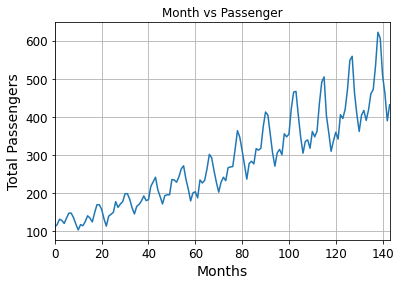

In [ ]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])

In [ ]:
all_data = flight_data['passengers'].values.astype(float)

test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [ ]:
print(len(train_data))
print(len(test_data))

132
12


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [ ]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)


In [ ]:
train_window = 12

In [ ]:
'''
The function will accept the raw input data and will return a list of tuples. 
In each tuple, the first element will contain list of 12 items corresponding 
to the number of passengers traveling in 12 months, the second tuple element 
will contain one item i.e. the number of passengers in the 12+1st month
'''

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [ ]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)


In [ ]:
print(train_inout_seq[0][0])
print(train_inout_seq[0][1])

tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
        -0.8593, -0.9341, -1.0000, -0.9385])
tensor([-0.9516])


In [ ]:
'''
input_size: Corresponds to the number of features in the input.
Though our sequence length is 12, for each month we have only 
1 value i.e. total number of passengers, therefore the input size will be 1.
'''

'''
hidden_layer_size: Specifies the number of hidden layers along 
with the number of neurons in each layer. 
We will have one layer of 100 neurons.
'''

'''
output_size: The number of items in the output, 
since we want to predict the number of passengers
for 1 month in the future, the output size will be 1.
'''

'''
Inside the forward method, the input_seq is passed as a parameter, 
which is first passed through the lstm layer. The output of the lstm layer is 
the hidden and cell states at current time step, along with the output. 
The output from the lstm layer is passed to the linear layer. 
The predicted number of passengers is stored in the last item of the 
predictions list, which is returned to the calling function.
'''


class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=250, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]




In [ ]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 300

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')


epoch:   1 loss: 0.03217940
epoch:  26 loss: 0.10798632
epoch:  51 loss: 0.08700537
epoch:  76 loss: 0.08068001
epoch: 101 loss: 0.08069772
epoch: 126 loss: 0.08067371
epoch: 151 loss: 0.08066552
epoch: 176 loss: 0.10877632
epoch: 201 loss: 0.10724123
epoch: 226 loss: 0.10543448
epoch: 251 loss: 0.01964139
epoch: 276 loss: 0.02972045
epoch: 299 loss: 0.0523491390


In [ ]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()

model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())
test_inputs[fut_pred:]


[0.2174944430589676,
 0.21748070418834686,
 0.21747292578220367,
 0.21745999157428741,
 0.21744884550571442,
 0.21743853390216827,
 0.21742768585681915,
 0.21741695702075958,
 0.21740780770778656,
 0.21739967167377472,
 0.2173919826745987,
 0.21738387644290924]

In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[380.9799858 ]
 [380.9768602 ]
 [380.97509062]
 [380.97214808]
 [380.96961235]
 [380.96726646]
 [380.96479853]
 [380.96235772]
 [380.96027625]
 [380.95842531]
 [380.95667606]
 [380.95483189]]


In [ ]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


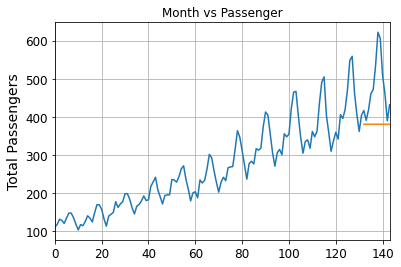

In [ ]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()